In [34]:
import numpy  as np
import pandas as pd

import matplotlib.pyplot as plt

from scipy import stats

In [35]:
plt.style.use("fivethirtyeight")

In [36]:
SIZE = 10000
# N_BINS = int(1 + np.log2(SIZE))
N_BINS = 50

SEED = 42

Seja um v.a. X com função densidade de probabilidade (fdp) Normal com média zero e variância igual a 1. Gere uma sequência desta distribuição com 10.000 pontos.

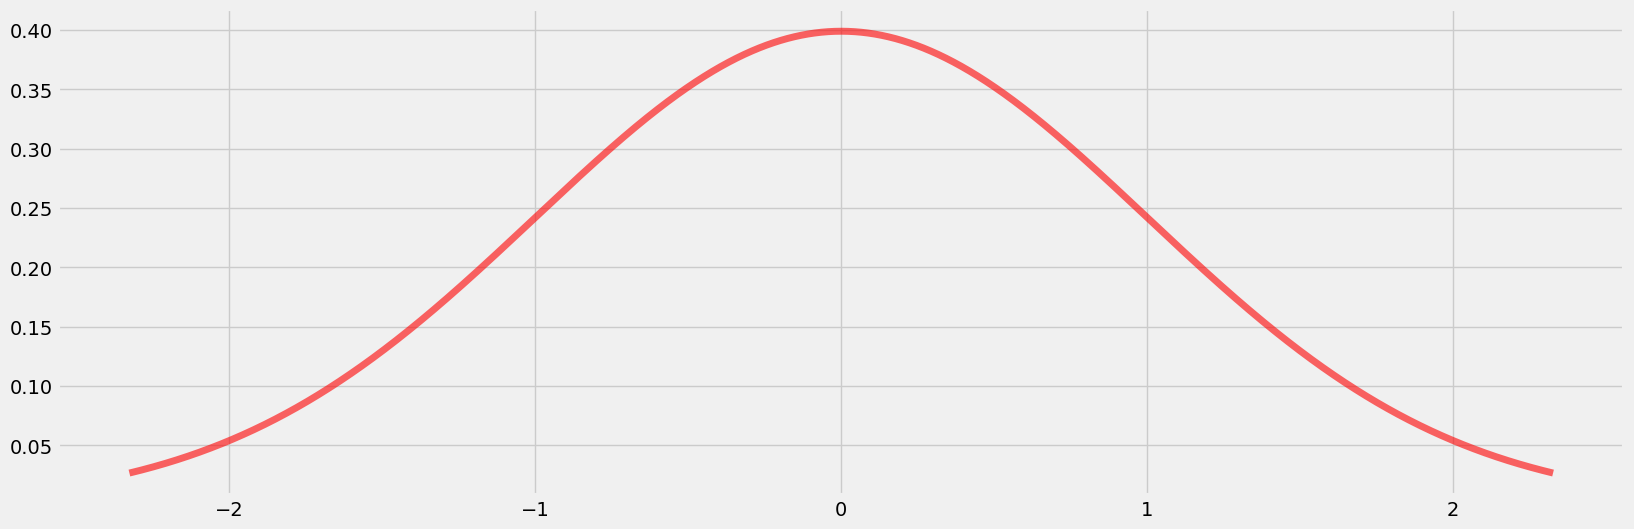

In [37]:
fig, ax = plt.subplots(figsize=(18, 6))

x = np.linspace(stats.norm.ppf(0.01), stats.norm.ppf(0.99), SIZE)
pdf = stats.uniform.rvs(size=SIZE, loc=0, scale=1)

ax.plot(x, stats.norm.pdf(x), "r-", lw=5, alpha=0.6)

plt.show()

a. Obtenha histogramas para os 10 primeiros pontos, os 100 primeiros pontos, os 1.000 primeiros pontos e os 10.000 pontos. Analise os resultados.

In [38]:
stats_var = pd.DataFrame({
  "Mean":     [],
  "Variance": []
})

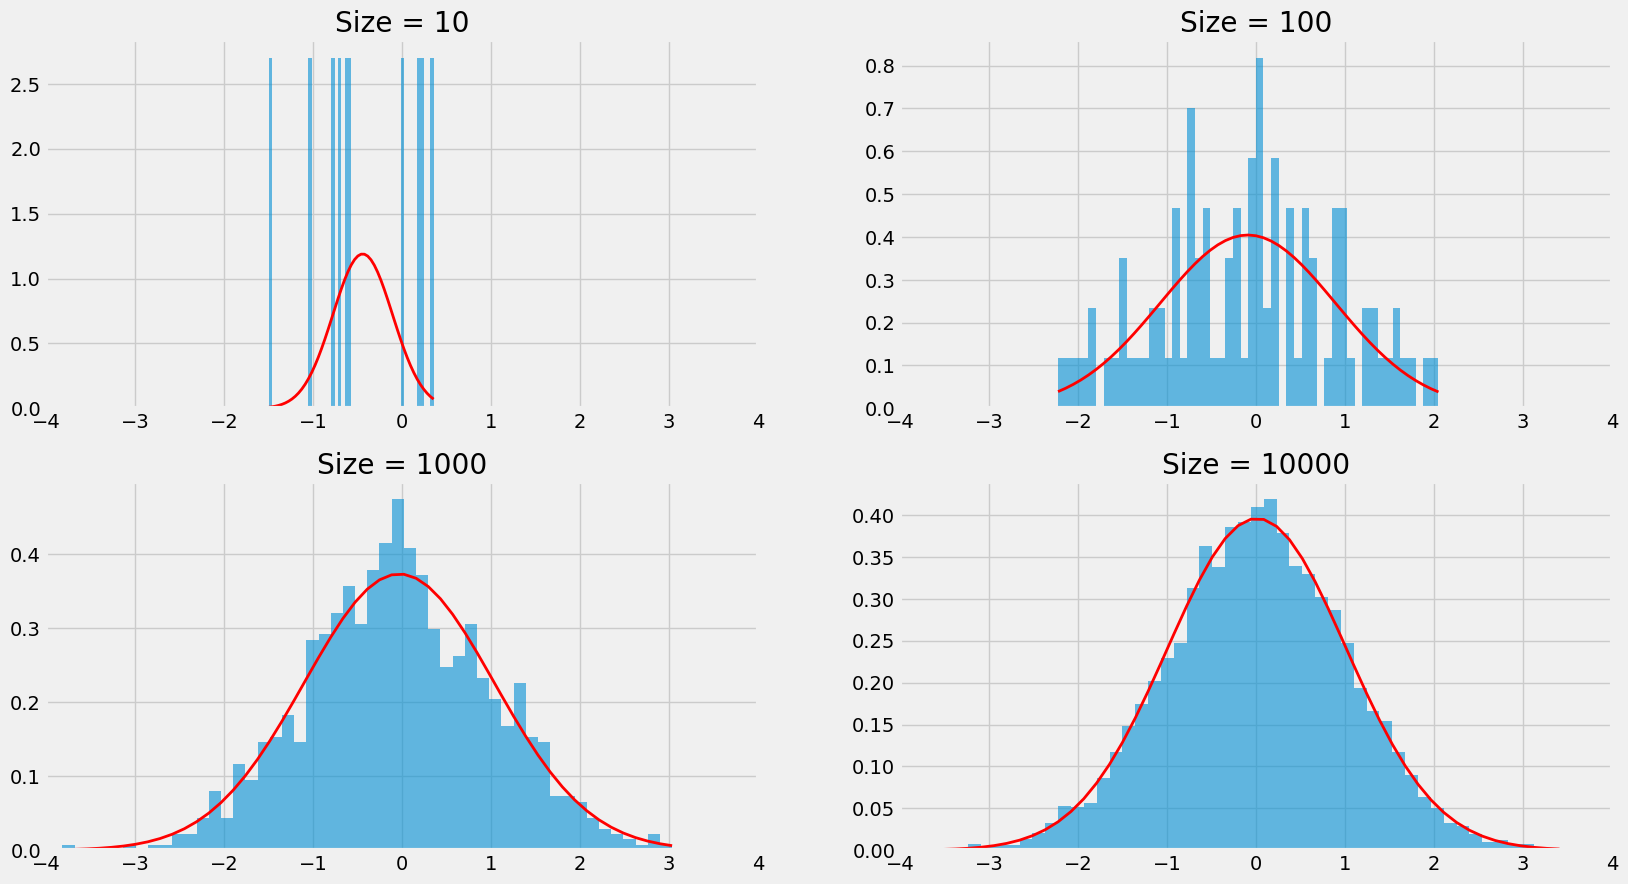

In [39]:
fig, ax = plt.subplots(2, 2, figsize=(18, 10))

rand_var = stats.norm.rvs(size=SIZE)

for i, axis in enumerate(ax.flat):
  size   = 10**(i + 1)
  sample = rand_var[:size]

  new_row = pd.DataFrame({
    "Mean":     np.mean(sample),
    "Variance": np.var(sample)
  }, index=[0])

  stats_var = pd.concat([stats_var, new_row], ignore_index=True)

  n, bins, patches = axis.hist(rand_var[:size], bins=N_BINS, density=True, alpha=0.6)

  pdf = stats.norm.pdf(bins, loc=new_row["Mean"], scale=new_row["Variance"])

  axis.plot(bins, pdf, "r-", label="PDF", linewidth=2)

  axis.set_title(f"Size = {size}")
  axis.set_xlim(-4, 4)

stats_var.index = [ f"Size = {10**(i + 1)}" for i in range(4) ]

b. Calcule a média e a variância considerando-se: os 10 primeiros pontos, os 100
primeiros pontos, os 1.000 primeiros pontos, e os 10.000 pontos. Analise os
resultados.

In [40]:
stats_var

,Mean,Variance
Size = 10,-0.440450,0.335423
Size = 100,-0.092744,0.986101
Size = 1000,-0.029884,1.067772
Size = 10000,0.008853,1.007219


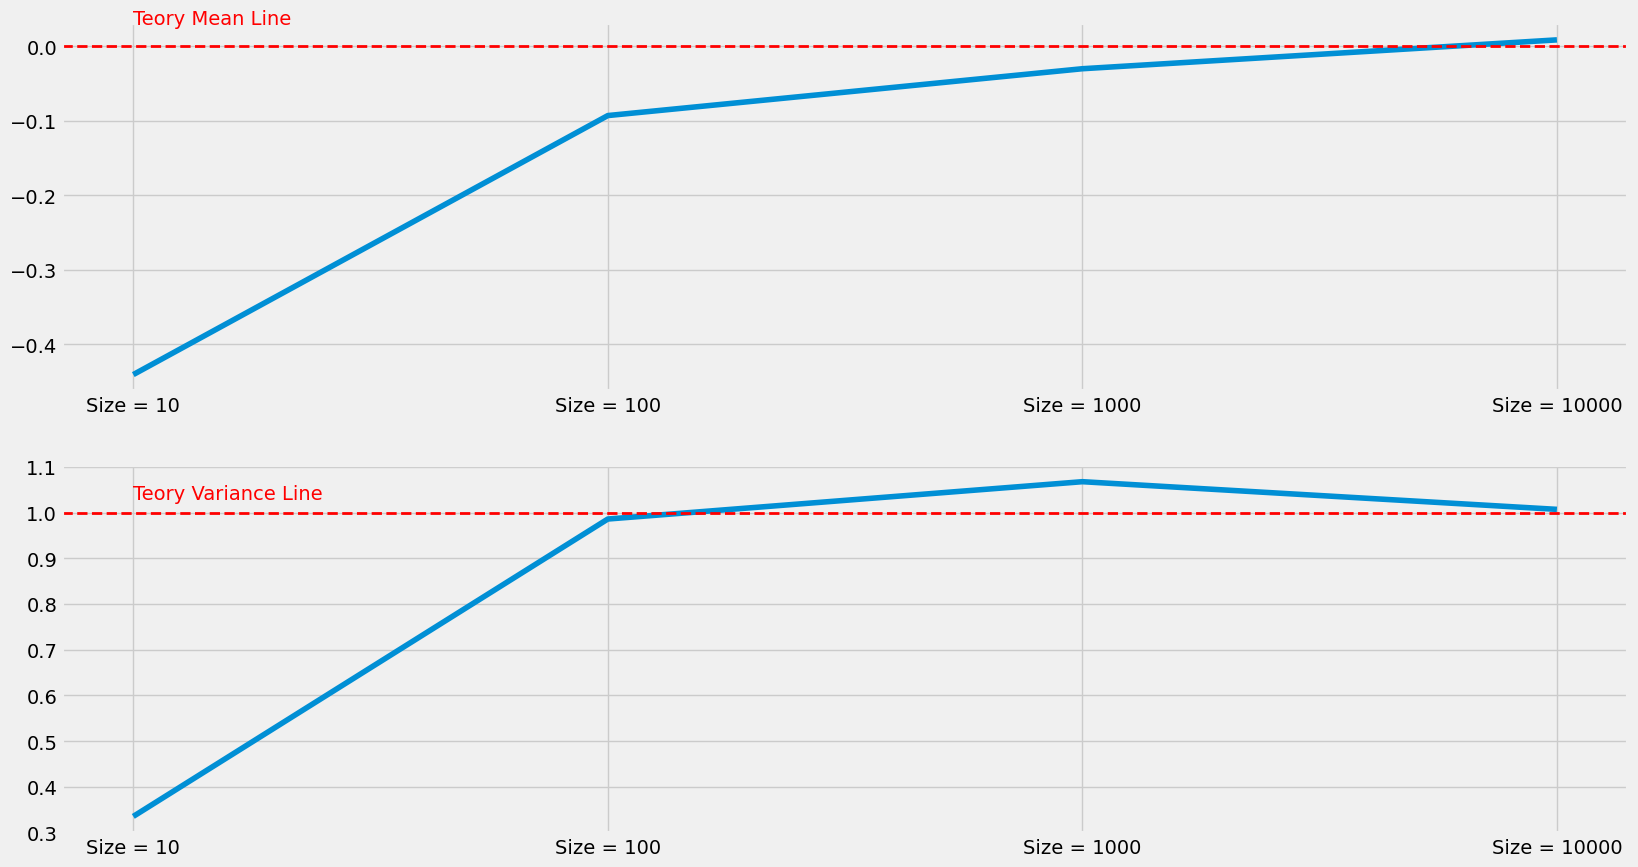

In [54]:
fig, ax = plt.subplots(2, figsize=(18, 10))

ax[0].plot(stats_var["Mean"])
ax[0].axhline(y=0, color="r", linestyle='--', linewidth=2)
ax[0].text(0, 0.03, "Teory Mean Line", color="red")

ax[1].plot(stats_var["Variance"])
ax[1].axhline(y=1, color="r", linestyle='--', linewidth=2)
ax[1].text(0, 1.03, "Teory Variance Line", color="red")

plt.show()